In [10]:
# Newton Verfahren 

In [11]:
import sympy as sy
from sympy.utilities.lambdify import lambdify
import pandas as pd 
import matplotlib.pyplot as plt

In [12]:
# Anwendung 

# Berechnen und Rückgabe einer Nullstelle und der Anzahl der benötigten Durchläufe. 

# Variablen 
# f = Funktion 
# df = Ableitung
# x0 = Wert an der Stelle x0 
# max_iter = maximale Durchläufe 
# xn = Parameter
# iterations - Parameter
# list1 = Resultate
# dtf = Pandas Dataframe

# Methoden 
# Differenzieren mit Sympy 
# Syntax : sympy.diff(expression, reference variable)
# Return : Return differentiation of mathematical expression.

# Newton Formel
# x = xn - f(xn)/DF(xn)


In [13]:
# Abbruchsbedingung 
# 1. Wenn die Ableitung 0 ist.
# 2. Wenn sich die ersten zwei Nachkommastellen über 2 Durchläufe nicht mehr verändern. 
# 3. Wenn die Anzahl der Durchläufe die maximale Anzahl erreicht hat

In [14]:
# Kapselung in Sympy Object 
class function1(sy.Function):
    @classmethod
    def eval(cls, x):
        return x**2 - x - 1
        #return x*x+4*x+3

In [15]:
def solve(f, x0):
    
    max_iter = 100
    x = sy.Symbol('x')
    list1 = []

    df = lambdify(x,f(x).diff(x))

    def newton(xn,iterations=1): 
            print("Newton(%.9f,%d)" %(xn,iterations))
            result = xn - f(xn) / df(xn)
            list1.append(float(result))
            
            if(iterations<=max_iter):
                if(sy.Abs(result-xn)>0.0000001):
                    return newton(result, iterations+1)
            
            # sympy.core.numbers.Rational
            return float(result)
    
    return (newton(x0), list1)

Newton(2.000000000,1)
Newton(1.666666667,2)
Newton(1.619047619,3)
Newton(1.618034448,4)
Newton(1.618033989,5)
Anzahl Versuche: 5
Endresultat 1.618033988749895
------------------------------
Newton(3.000000000,1)
Newton(2.000000000,2)
Newton(1.666666667,3)
Newton(1.619047619,4)
Newton(1.618034448,5)
Newton(1.618033989,6)
Anzahl Versuche: 6
Endresultat 1.618033988749895
------------------------------
Newton(4.000000000,1)
Newton(2.428571429,2)
Newton(1.788359788,3)
Newton(1.629292831,4)
Newton(1.618090113,5)
Newton(1.618033990,6)
Anzahl Versuche: 6
Endresultat 1.618033988749895
------------------------------
Newton(5.000000000,1)
Newton(2.888888889,2)
Newton(1.956072351,3)
Newton(1.657273088,4)
Newton(1.618699219,5)
Newton(1.618034187,6)
Newton(1.618033989,7)
Anzahl Versuche: 7
Endresultat 1.618033988749895
------------------------------
Newton(6.000000000,1)
Newton(3.363636364,2)
Newton(2.150072150,3)
Newton(1.703807391,4)
Newton(1.621089742,5)
Newton(1.618038153,6)
Newton(1.618033989,7

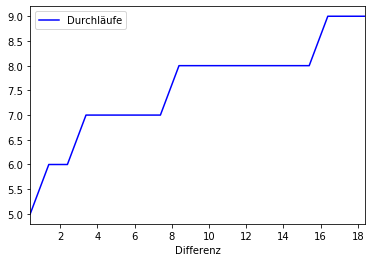

In [20]:
#main function  
def main():
    
    # Variablen
    f = function1
    data = []
    
    
    # Daten 
    for n in range(1, 20):
        x0 = n + 1
        result, list1 = solve(f, x0)
        data.append(( abs(result-x0), len(list1)))
    
    # Ausgabe Konsole
        print("Anzahl Versuche:",len(list1))
        print("Endresultat",result)
        print("------------------------------")
        
    # Visualisierung    
        
    # Pandas DataFrame 
    dtf = pd.DataFrame(data, columns =['Differenz', 'Durchläufe']) 
                
    # Matplotlib 
    #x Achse - Differenz result - x0
    #y Achse - Anzahl Durchläufe
    dtf.plot(kind="line",x='Differenz',y='Durchläufe',color='blue')
    plt.show()

if __name__ == "__main__":
    main()